### Importing relevant libraries

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Prepare data for clustering

In [4]:
customers = pd.read_csv("C:/Users/satya/Downloads/Customers (1).csv")
products = pd.read_csv("C:/Users/satya/Downloads/Products (1).csv")
transactions = pd.read_csv("C:/Users/satya/Downloads/Transactions.csv")

customer_transactions = transactions.groupby('CustomerID').agg({
    'Quantity': 'sum', 
    'TotalValue': 'sum'
}).reset_index()

merged_customers = pd.merge(customers, customer_transactions, on='CustomerID', how='left').fillna(0)
clustering_data = merged_customers[['Quantity', 'TotalValue']]

### Step 2: Apply k-means clustering

In [6]:
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust clusters as needed
clusters = kmeans.fit_predict(clustering_data)

C:\Users\satya\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\satya\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\satya\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\satya\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\satya\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

### Add cluster labels to the dataset

In [8]:
merged_customers['Cluster'] = clusters

### Step 3: Evaluate clustering

In [10]:
db_index = davies_bouldin_score(clustering_data, clusters)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 0.5500489864963429


### Step 4: Visualize clusters

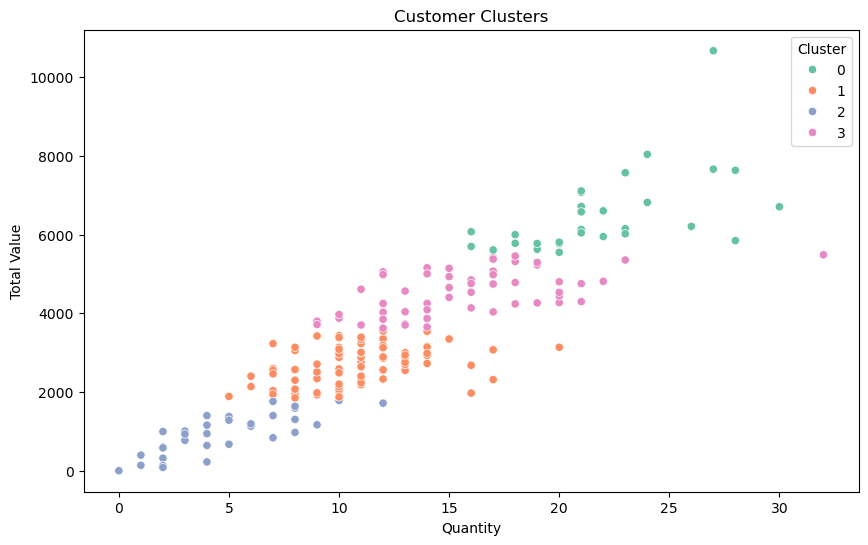

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Quantity', y='TotalValue', hue='Cluster', data=merged_customers, palette='Set2'
)
plt.title('Customer Clusters')
plt.xlabel('Quantity')
plt.ylabel('Total Value')
plt.show()

### Save clustering results

In [14]:
merged_customers.to_csv('YourName_Clustering.csv', index=False)